# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Data

In [2]:
df = pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')

# Data Information

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

# Data Cleaning

In [5]:
df.duplicated().sum()

0

# Data Prepocessing

In [6]:
cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

def map(x):
  if x == 'Yes':
    return 1
  else:
    return 0

for i in cols:
  df[i] = df[i].apply(lambda x:1 if x == 'Yes' else 0)

In [7]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 0 if x == '7-8 hours' else 1 if x == 'Less than 5 hours' else 2 if x == '5-6 hours' else 3)
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: 0 if x == 'Unhealthy' else 1 if x == 'Healthy' else 2)

In [8]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,0,2,0,6,2,0,0
1,1,60,4.0,3.0,2,0,1,0,4,1,0
2,0,42,2.0,3.0,2,2,0,0,2,0,0
3,0,44,3.0,5.0,0,1,1,1,2,1,0
4,1,48,4.0,3.0,0,2,1,6,5,1,0


# Data Modeling

## Train Test Split

In [9]:
features = [col for col in df.columns if col not in ['Depression']]
target = ['Depression']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## NN Baseline Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=[X_test,y_test], epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8935 - loss: 0.4340 - val_accuracy: 0.8954 - val_loss: 0.3192
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9078 - loss: 0.2612 - val_accuracy: 0.8954 - val_loss: 0.2402
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.2162 - val_accuracy: 0.9002 - val_loss: 0.2118
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.1989 - val_accuracy: 0.9148 - val_loss: 0.1947
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.1934 - val_accuracy: 0.9075 - val_loss: 0.1900
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.1954 - val_accuracy: 0.9221 - val_loss: 0.1746
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9378 - loss: 0.1541 - val_accuracy: 0.9294 - val_loss: 0.1668
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9383 - loss: 0.1522 - val_accuracy: 0.9173 - val_loss:

# Model Evaluation

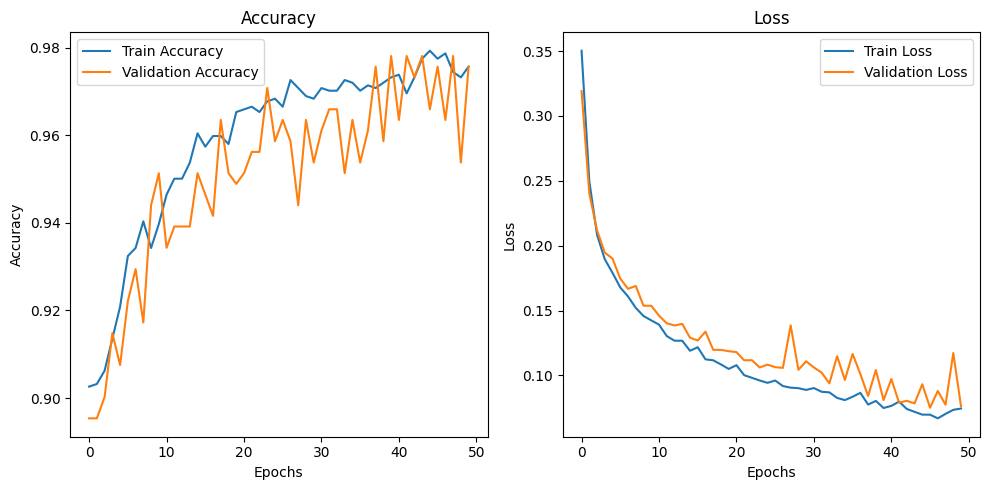

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(acc, label='Train Accuracy')
axes[0].plot(val_acc, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(loss, label='Train Loss')
axes[1].plot(val_loss, label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [12]:
pred_labels = (model.predict(X_test) > 0.5).astype(int)

acc = accuracy_score(y_test, pred_labels)
prec = precision_score(y_test, pred_labels)
f1 = f1_score(y_test, pred_labels)
recall = recall_score(y_test, pred_labels)
print(f'accuracy: {acc:.2f}, precision: {prec:.2f}, f1 score: {f1:.2f}, recall: {recall:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
accuracy: 0.98, precision: 0.95, f1 score: 0.88, recall: 0.81


In [13]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.0711 


[0.07617863267660141, 0.9756690859794617]

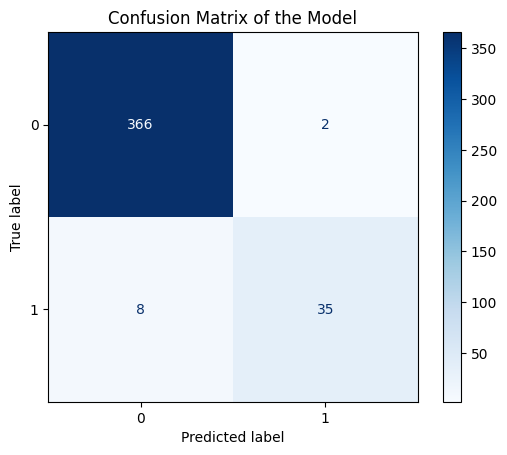

In [14]:
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model')
plt.show()

In [15]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       368
           1       0.95      0.81      0.88        43

    accuracy                           0.98       411
   macro avg       0.96      0.90      0.93       411
weighted avg       0.98      0.98      0.97       411



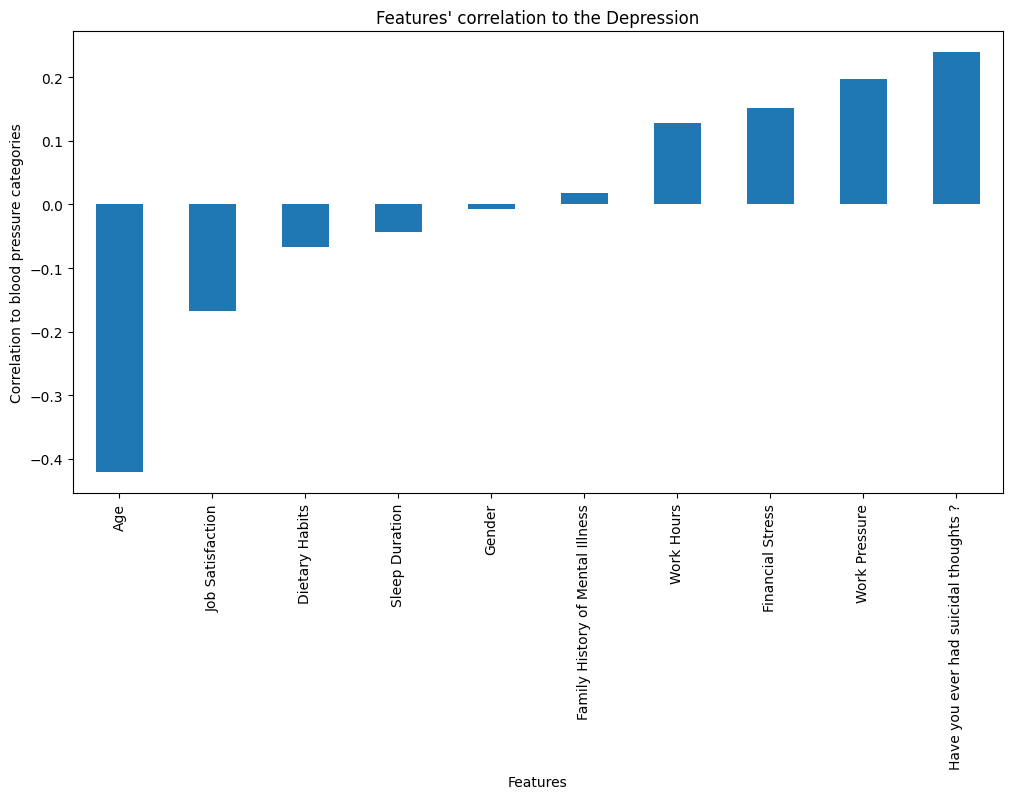

In [16]:
plt.figure(figsize=(12,6))

df.corr()['Depression'].sort_values(ascending = True)[:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the Depression')
plt.show()